In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv', index_col='PassengerId')

In [3]:
df.shape

(891, 11)

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# df['Family'] = df['SibSp'] + df['Parch']
# df.drop(['SibSp','Parch'],axis=1)

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.duplicated().sum()

0

In [8]:
df = df.drop(['Name','Cabin','Ticket'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [10]:
df['Survived']=df['Survived'].astype('object')
df['Pclass']=df['Pclass'].astype('object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [12]:
na_features = [features for features in df.columns if df[features].isnull().sum() > 0]

for feature in na_features:
    print(feature,': ', df[feature].isnull().mean()*100, '% missing values')

Age :  19.865319865319865 % missing values
Embarked :  0.22446689113355783 % missing values


In [13]:
def categorize_variables(df):

    categorical = []
    discrete = []
    continuous = []

    for column in df.columns:
        if pd.api.types.is_object_dtype(df[column]):
            categorical.append(column)
            
        elif pd.api.types.is_numeric_dtype(df[column]):
            # Consider a variable discrete if the number of unique values is less than 20% of the total observations
            if len(df[column].unique()) / len(df) < 0.05:
                discrete.append(column)
            else:
                continuous.append(column)
                
        elif pd.api.types.is_datetime64_any_dtype(df[column]):
            # Date/time variables could be treated separately or considered continuous based on context
            continuous.append(column)
        else:
            # Default to categorical for any other types not explicitly handled
            categorical.append(column)

    return categorical, discrete, continuous

In [14]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [15]:
categorical, discrete, continuous = categorize_variables(df)

print("Categorical Variables:", categorical)
print("Discrete Variables:", discrete)
print("Continuous Variables:", continuous)

Categorical Variables: ['Survived', 'Pclass', 'Sex', 'Embarked']
Discrete Variables: ['SibSp', 'Parch']
Continuous Variables: ['Age', 'Fare']


In [16]:
def enhanced_eda_plots(df, categorical, discrete, continuous, target=None):

    # Correlation Heatmap for Numerical Variables
    if continuous or discrete:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df[continuous + discrete].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()

    # Count Plots for Categorical Variables
    if categorical:
        for cat_var in categorical:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=cat_var, data=df)
            plt.title(f'Count Plot for {cat_var}')
            plt.xticks(rotation=45)
            plt.show()

    # PDFs for Numeric (Discrete) Variables
    if discrete:
        for disc_var in discrete:
            plt.figure(figsize=(10, 6))
            sns.distplot(df[disc_var], kde=True, hist=False)
            plt.title(f'Probability Density Function for {disc_var}')
            plt.xlabel(disc_var)
            plt.ylabel('Density')
            plt.show()
    
    # Histograms for Continuous Variables
    if continuous:
        for cont_var in continuous:
            plt.figure(figsize=(10, 6))
            sns.histplot(df[cont_var], kde=True, bins=30)
            plt.title(f'Histogram for {cont_var}')
            plt.xlabel(cont_var)
            plt.ylabel('Frequency')
            plt.show()

    # Box Plots for Continuous and Discrete Variables
    # This section assumes you might want to see how these variables distribute across a categorical target.
    num_vars = continuous + discrete
    if target and categorical and any(num_vars):
        for cat_var in categorical:
            for num_var in num_vars:
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=cat_var, y=num_var, data=df)
                plt.title(f'Box Plot of {num_var} by {cat_var}')
                plt.xticks(rotation=45)
                plt.show()
    elif num_vars:  # If no categorical target is specified, plot without stratification
        for num_var in num_vars:
            plt.figure(figsize=(10, 6))
            sns.boxplot(y=num_var, data=df)
            plt.title(f'Box Plot for {num_var}')
            plt.show()


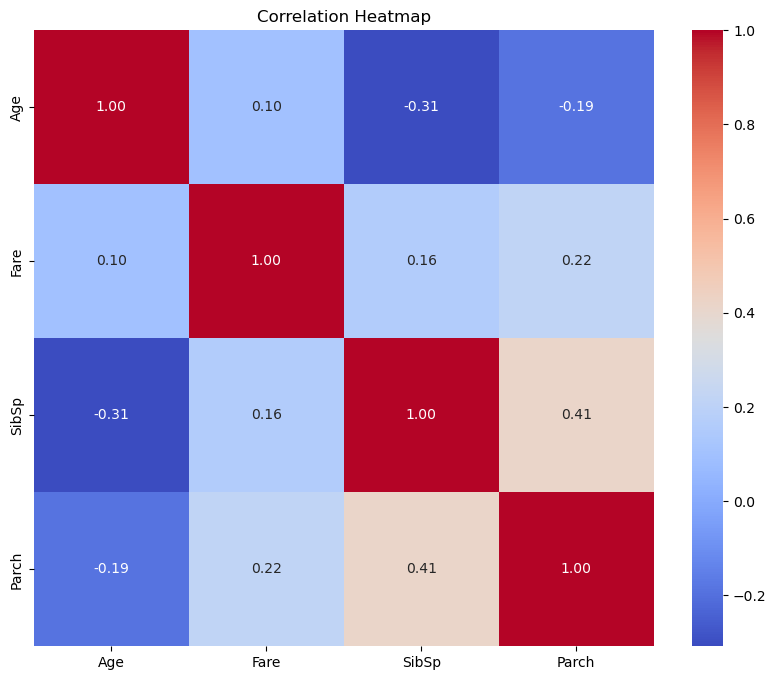

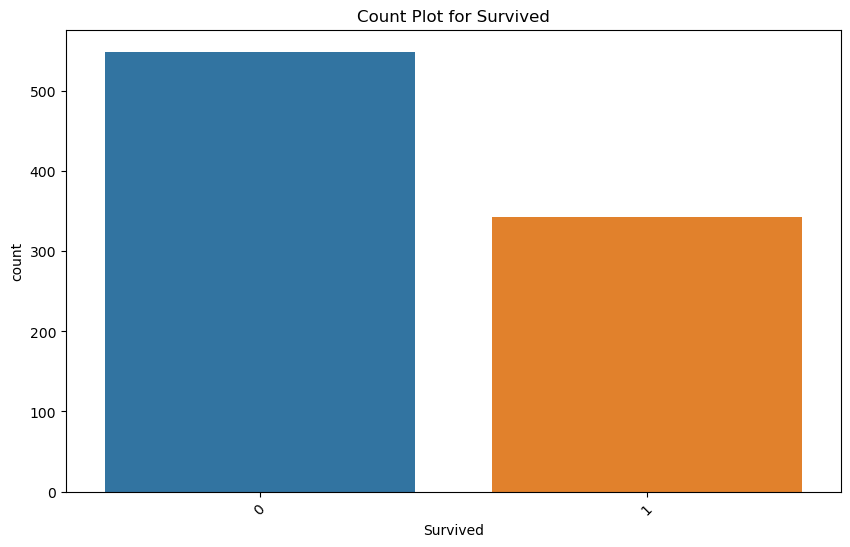

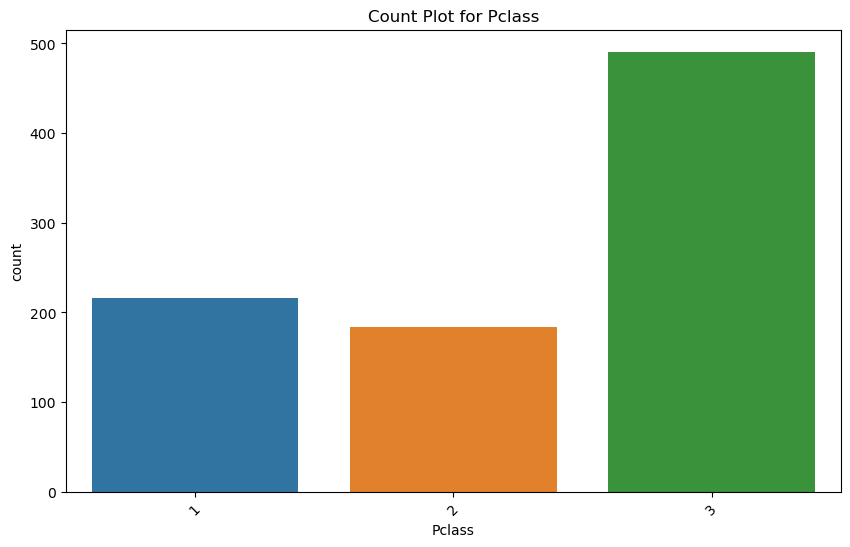

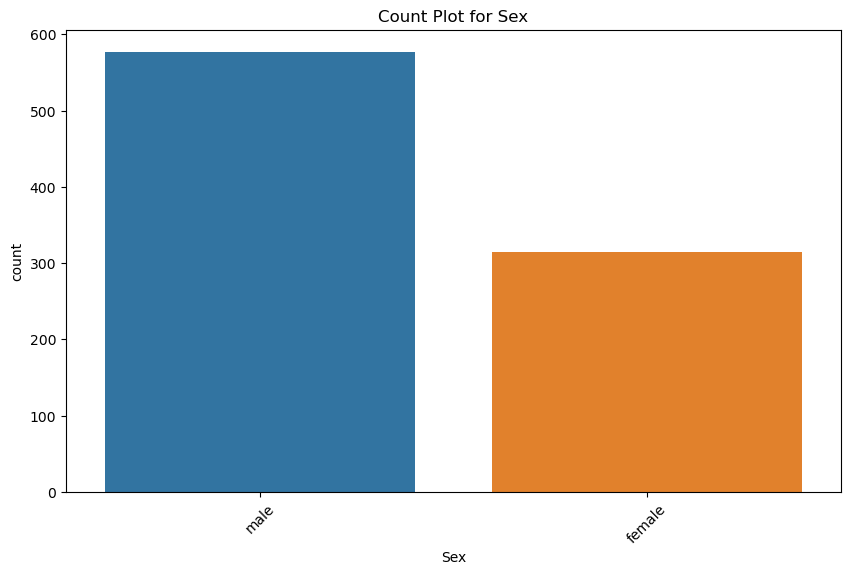

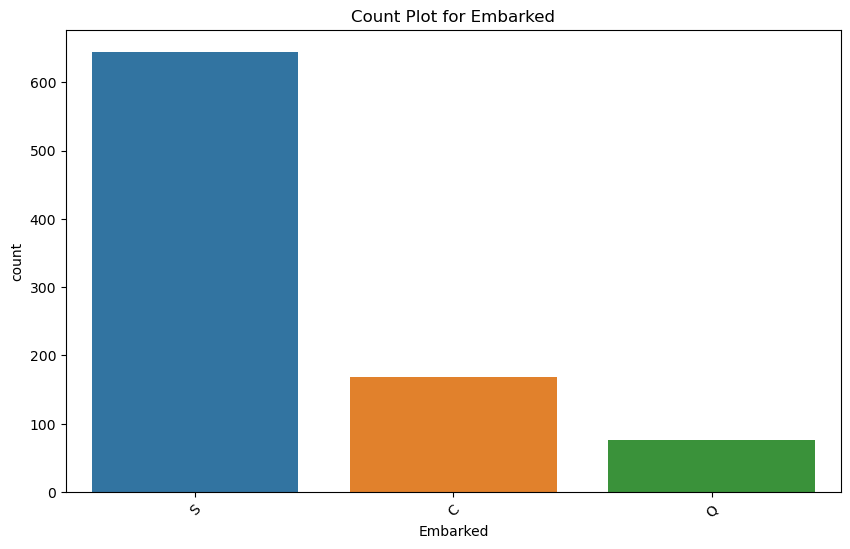

/var/folders/d3/x5057gxn4bx7wq14p394lr780000gn/T/ipykernel_17231/78511628.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[disc_var], kde=True, hist=False)


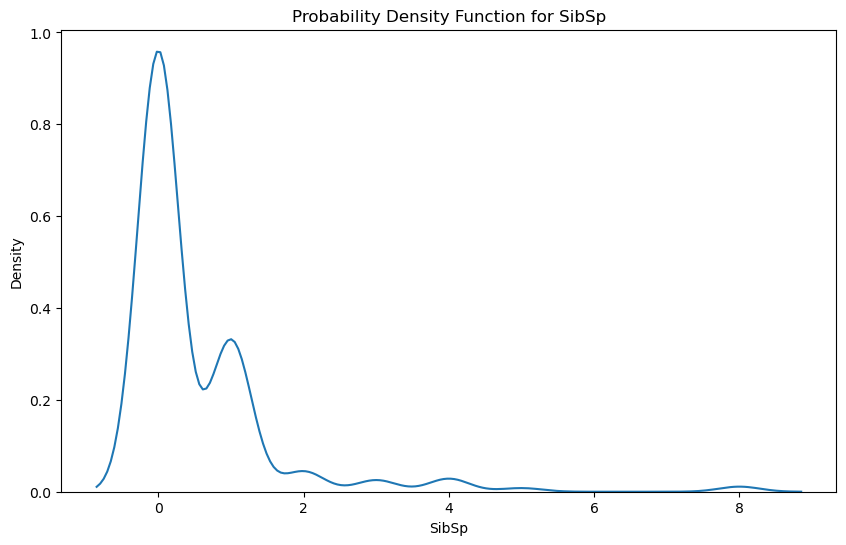

/var/folders/d3/x5057gxn4bx7wq14p394lr780000gn/T/ipykernel_17231/78511628.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[disc_var], kde=True, hist=False)


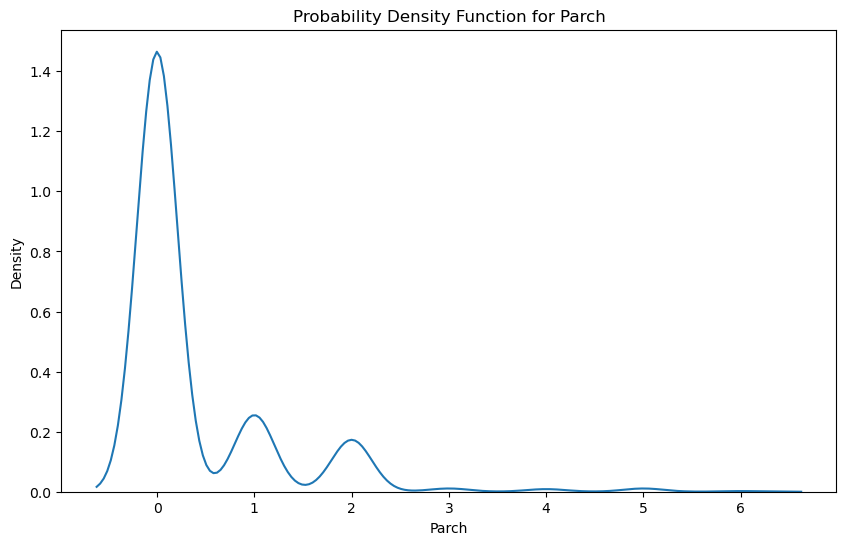

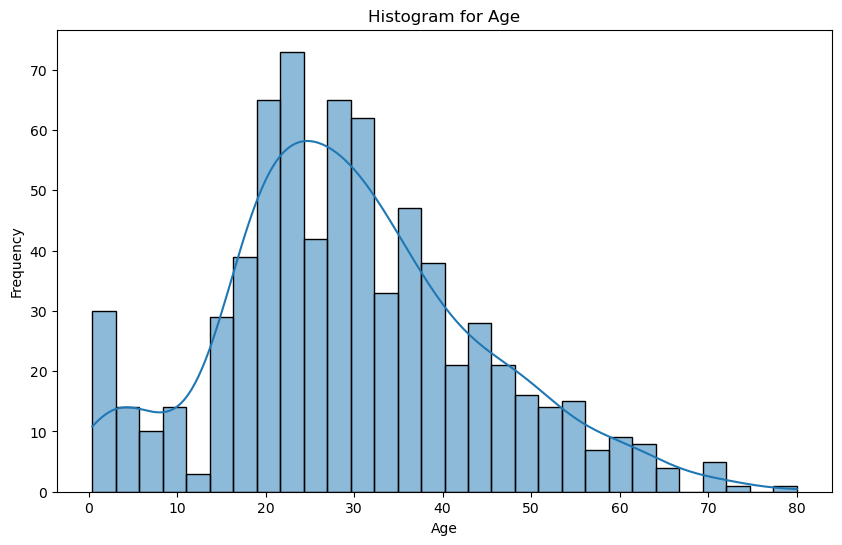

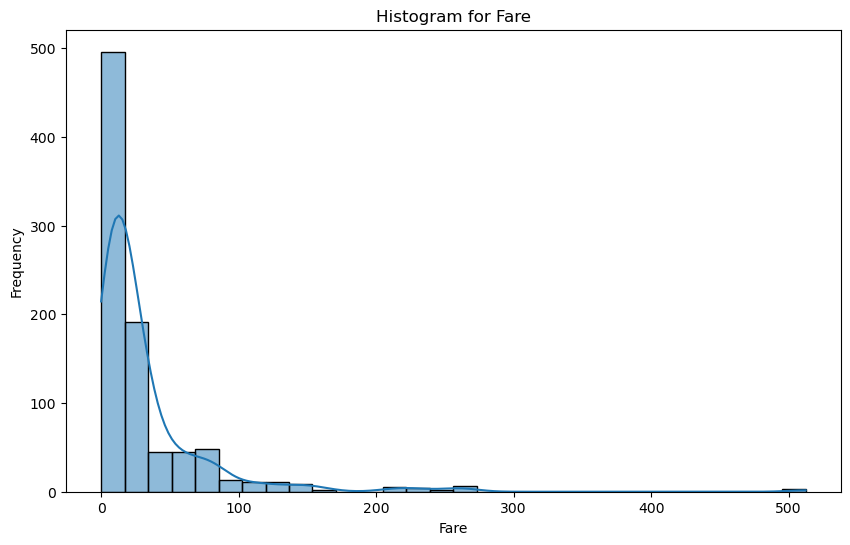

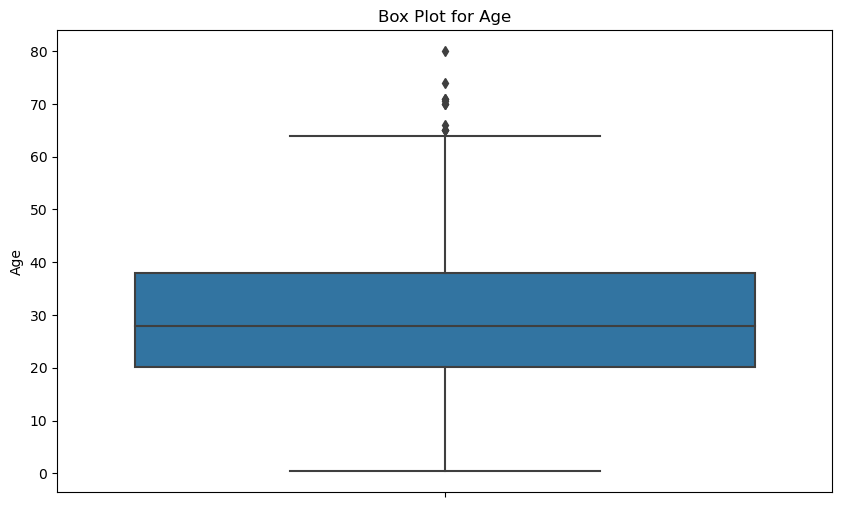

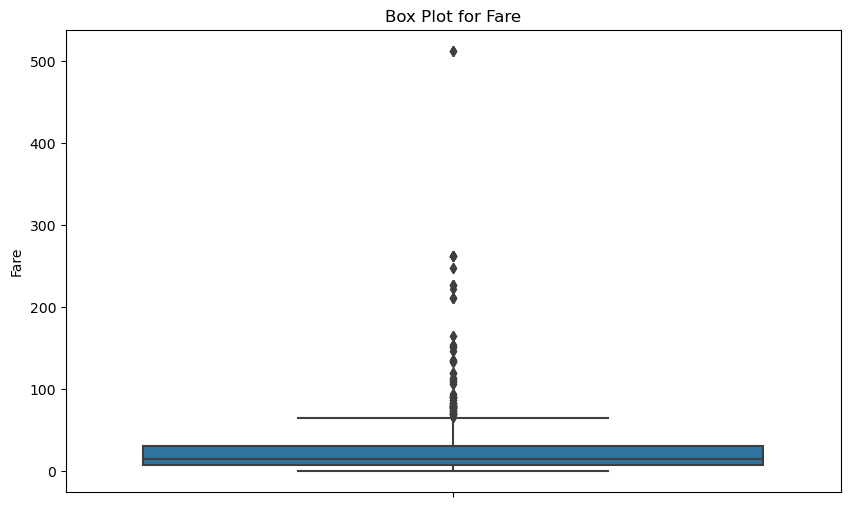

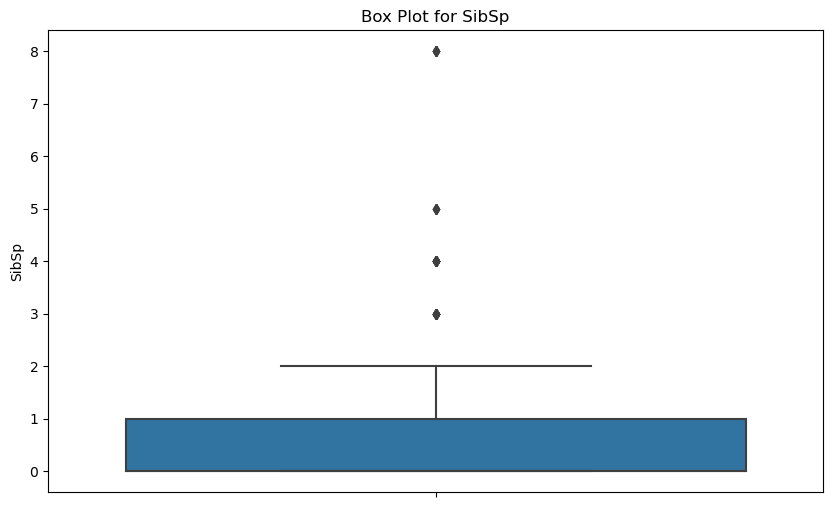

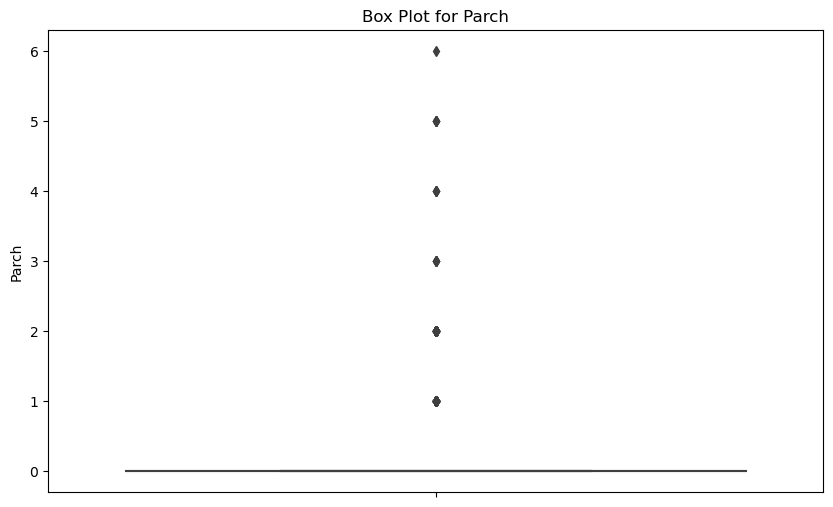

In [17]:
enhanced_eda_plots(df, categorical, discrete, continuous)

In [18]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame and 'YourTargetVariable' is the name of your target variable
X = df.drop('Survived', axis=1)  # Features
y = pd.factorize(df['Survived'])[0]  # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
X_train.shape

(712, 7)

In [20]:
y_train.shape

(712,)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer, RobustScaler
from sklearn.impute import SimpleImputer

In [22]:
# trf1: SimpleImputer for handling missing values
trf1 = SimpleImputer(strategy='mean')  # For numeric columns; use 'most_frequent' or 'constant' for categoricals

# trf2: StandardScaler for feature scaling
trf2 = StandardScaler()

# trf3: RobustScaler with quantile_range for capping outliers
trf3 = RobustScaler(quantile_range=(25, 75))

# trf4: Encodings for categorical variables - combining OneHotEncoder, OrdinalEncoder, and a custom label encoding
# OneHotEncoder
onehot = OneHotEncoder(handle_unknown='ignore')

# trf5: Log transform for skewed numerical data
def log_transform(x):
    return np.log1p(x)  # log1p for handling 0 values smoothly
trf5 = FunctionTransformer(log_transform)


In [23]:
numeric_standardized = ['Fare','Age']  # Columns to be standardized
categorical_features_onehot = ['Sex','Embarked']  # Columns for one-hot encoding
categorical_features_ordinal = ['Pclass']  # Columns for ordinal encoding
skewed_features = ['Fare']  # Columns to apply log transform

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', trf1), ('scaler', trf2), ('capper', trf3)]), numeric_standardized),
        ('cat_onehot', onehot, categorical_features_onehot),
        ('log_transform', trf5, skewed_features)
    ],
    remainder='passthrough',
    sparse_threshold=0.0
)

Logistic Regression 

In [24]:
from sklearn.linear_model import LogisticRegression

# Create the pipeline by combining the preprocessor with a model
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

# Fit the pipeline to your training data
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('capper',
                                                                   RobustScaler(quantile_range=(25,
                                                                                                75)))]),
                                                  ['Fare', 'Age']),
                                                 ('cat_onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x1683758a0>),
                                                  ['Fare'])])),
                ('model', LogisticRegression())])

In [25]:
import pickle

# Save the model to a file
with open('model1_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline1, file)

In [26]:
# Load the model from a file
with open('model1_pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

In [27]:
y_pred = loaded_pipeline.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7988826815642458
Precision: 0.7714285714285715
Recall: 0.7297297297297297
F1 Score: 0.75


Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Create the pipeline by combining the preprocessor with a model
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

# Fit the pipeline to your training data
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('capper',
                                                                   RobustScaler(quantile_range=(25,
                                                                                                75)))]),
                                                  ['Fare', 'Age']),
                                                 ('cat_onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x1683758a0>),
                                                  ['Fare'])])),
                ('model', RandomForestClassifier())])

In [29]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipeline2, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7977937555402344

In [30]:
# gridsearchcv
params = {
    'model__max_depth':[1,2,3,4,5,None],
    'model__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'model__max_features': ['auto', 'sqrt']
}

In [31]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipeline2, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/devambani/anaconda3/lib/python3.11/site-packages/sklearn/pipe

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0.0,
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('capper',
                                                                                          RobustScaler(quantile_range=(25,
                                                                                                                       75)))]),
                                                                         ['Fare',
                                                                          'Age']),
                                                                        ('cat_onehot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'Embarked']),
                                                                        ('log_transform',
                                                                         FunctionTransformer(func=<function log_transform at 0x1683758a0>),
                                                                         ['Fare'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [1, 2, 3, 4, 5, None],
                         'model__max_features': ['auto', 'sqrt'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [32]:
grid.best_score_

0.8286220821432089

In [33]:
grid.best_params_

{'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 10,
 'model__n_estimators': 300}

In [34]:
best_params = grid.best_params_

# Set the best parameters to the pipeline
pipeline2.set_params(**best_params)

# Fit the pipeline with the entire training data
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('capper',
                                                                   RobustScaler(quantile_range=(25,
                                                                                                75)))]),
                                                  ['Fare', 'Age']),
                                                 ('cat_onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x1683758a0>),
                                                  ['Fare'])])),
                ('model',
                 RandomForestClassifier(min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=300))])

In [35]:
# Pickle the trained pipeline to a file
with open('trained2_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline2, file)

In [36]:
# Load the pickled pipeline
with open('trained2_pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Predict on the test data
y_pred = loaded_pipeline.predict(X_test)

# Now you can use y_pred to calculate metrics against y_test
# Example: calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8268156424581006
Precision: 0.8307692307692308
Recall: 0.7297297297297297
F1 Score: 0.7769784172661871
